In [2]:
import numpy as np

import scipy
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import pandas as pd

import statistics as st

from sympy.solvers import solve
from sympy import Symbol

from sklearn.utils.extmath import svd_flip

import math

from sklearn.decomposition import PCA, KernelPCA

# Практическое задание 2
## Вариант 1

## Задание 1 

Рассмотрим данные:

|       | x<sub>1</sub> | x<sub>2</sub> | x<sub>3</sub> | x<sub>4</sub> | x<sub>5</sub> | x<sub>6</sub> | x<sub>7</sub> | x<sub>8</sub> |
| :---: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: |
| **A** |      1.9       |       2.9      |       1.4      |      -1.4       |      2      |      -1.4      |      -2.9      |      2      |
| **B** |      -5       |       -6.4      |       -1.5      |      -1.3       |      -6.3      |      -0.4      |      -3.1      |      -5.8      |

Есть ядро (функция сходства):
$$
K({\bf x}_i,{\bf x}_j)=||{\bf x}_i-{\bf x}_j||^2\\
$$

1. Построить диаграмму рассеяния точек **x<sub>i</sub>** (оси подписать, пронумеровать точки)
2. Рассчитать ядерную матрицу

### Данные

In [3]:
A = np.array([1.9, 2.9, 1.4, -1.4, 2, -1.4, -2.9, 2])
B = np.array([-5, -6.4, -1.5, -1.3, -6.3, -0.4, -3.1, -5.8])

D_1 = np.stack([A, B]).T

### Пункт 1

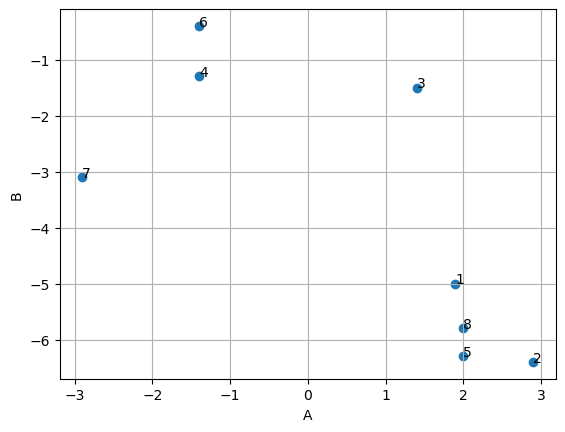

In [4]:
# строим диаграмму рассеивания
plt.scatter(A,B)

# нумеруем каждую точку
cnt = 1
for i in range(0, len(A)):
    plt.text(A[i], B[i], cnt)
    cnt = cnt + 1
# Добавление сетки    
plt.grid()
# Подпись осей
plt.xlabel("A")
plt.ylabel("B")
plt.show()

### Пункт 2

In [5]:
# Матрица 8 на 8
kernel = np.ndarray(shape=(len(D_1), len(D_1)), dtype=float)

# Рассчет матрицы ядра
for i, x_i in enumerate(D_1):
    for j, x_j in enumerate(D_1):
        dx = x_i - x_j
        kernel[i][j] = (np.linalg.norm(dx) ** 2)
        
print("Ядерная матрица K равна:\n", kernel)

Ядерная матрица K равна:
 [[ 0.    2.96 12.5  24.58  1.7  32.05 26.65  0.65]
 [ 2.96  0.   26.26 44.5   0.82 54.49 44.53  1.17]
 [12.5  26.26  0.    7.88 23.4   9.05 21.05 18.85]
 [24.58 44.5   7.88  0.   36.56  0.81  5.49 31.81]
 [ 1.7   0.82 23.4  36.56  0.   46.37 34.25  0.25]
 [32.05 54.49  9.05  0.81 46.37  0.    9.54 40.72]
 [26.65 44.53 21.05  5.49 34.25  9.54  0.   31.3 ]
 [ 0.65  1.17 18.85 31.81  0.25 40.72 31.3   0.  ]]


## Задание 2
Рассмотрим данные в виде матрицы **D**:

| ***X<sub>1</sub>*** | ***X<sub>2</sub>*** |
| :-----------------: | :-----------------: |
|         -46         |         -19         |
|         -72         |         132         |
|         -27         |         73         |
|         3         |         64         |
|         -50         |         145         |
|         -37         |         202         |
|         -49         |         9         |
|         -47         |         37         |

1. Построить диаграмму рассеяния (оси подписать, пронумеровать точки)

2. Рассчитайте среднее **μ** для матрицы **D**, ковариационную матрицу **Σ** для матрицы **D** и ковариационную матрицу **Σ<sub>c</sub>**  для центрированной матрицы **D**

3. Рассчитайте собственные числа и собственные вектора для матрицы **Σ<sub>c</sub>**

4. Выведите индекс (порядковый номер), соответствующий первой главной компоненте

5. Рассчитайте первый главный компонент. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)

6. Используя PCA из библиотеки sklearn, получите первую главную компоненту для матрицы **D**. Постройте точечный график полученного вектора (пронумеровать точки)

7. Визуально сравните графики, полученные в пунктах **5** и **6**. Убедитесь в корректности выполнения преобразований. Сохранен ли порядок точек? 

   Выведите название оси графика из пункта 1, проекция данных на которую сравнима с результатами PCA преобразований

8. **μ** и **Σ** сверху задают нормальное распределение, из которого были сгенерированы точки. Постройте диаграмму рассеяния, которая позволит определить ориентацию / размеры облака точек, полученного с помощью 2-мерной функции плотности вероятности. 

   На отдельном линейном графике постройте графики функций плотностей вероятности отдельных компонентов 2-мерного нормального распределения

### Данные

In [7]:
X1 = np.array([-46, -72, -27, 3, -50, -37, -49, -47])
X2 = np.array([-19, 132, 73, 64, 145, 202, 9, 37])
D_2 = np.stack([X1, X2])

### Пункт 1

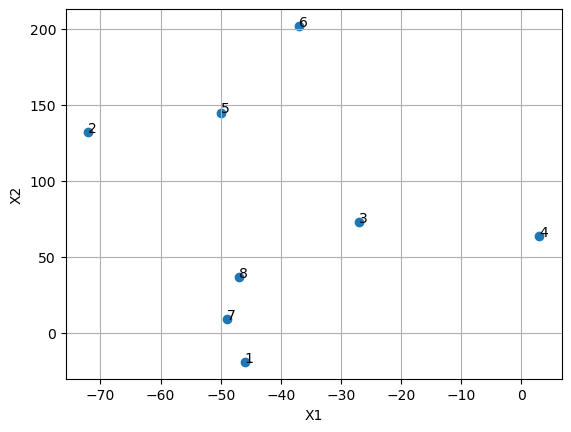

In [8]:
# строим диаграмму рассеивания
plt.scatter(X1,X2)

# нумеруем каждую точку
cnt = 1
for i in range(0, len(X1)):
    plt.text(X1[i], X2[i], cnt)
    cnt = cnt + 1
# Добавление сетки
plt.grid()
# Подпись осей
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### Пункт 2

In [9]:
mu = np.array([np.mean(X1), np.mean(X2)])
print("Среднее для матрицы D_2:", mu)

cov_matr = np.cov(D_2)
print("Ковариционная матрица для матрицы D_2:\n", cov_matr)

Z = np.stack([X1 - mu[0], X2 - mu[1]])
print("Отцентрированные данные:\n", Z.T)

cov_matr_c = np.cov(Z)
print("Ковариционная матрица для центрированной матрицы D_2:\n", cov_matr_c)

Среднее для матрицы D_2: [-40.625  80.375]
Ковариционная матрица для матрицы D_2:
 [[ 473.41071429 -170.16071429]
 [-170.16071429 5543.98214286]]
Отцентрированные данные:
 [[ -5.375 -99.375]
 [-31.375  51.625]
 [ 13.625  -7.375]
 [ 43.625 -16.375]
 [ -9.375  64.625]
 [  3.625 121.625]
 [ -8.375 -71.375]
 [ -6.375 -43.375]]
Ковариционная матрица для центрированной матрицы D_2:
 [[ 473.41071429 -170.16071429]
 [-170.16071429 5543.98214286]]


### Пункт 3

In [10]:
temp_data = np.linalg.eigh(cov_matr_c)
lam = temp_data[0]
U = temp_data[1]
print("Собственные числа:", lam, "Собственные вектора:", U, sep="\n")

Собственные числа:
[ 467.70679425 5549.6860629 ]
Собственные вектора:
[[-0.99943865 -0.03350196]
 [-0.03350196  0.99943865]]


### Пункт 4

In [11]:
ind = -1
if lam[0] > lam[1]:
    ind = 0
else:
    ind = 1
    
print("Индекс, соответствующий первой главной компоненте:", ind)
u_r = U[ind]

Индекс, соответствующий первой главной компоненте: 1


### Пункт 5

Первая главная компонента:
 [-99.13914295  52.64714452  -7.82732432 -17.82733111  64.90280378
 121.43528139 -71.05435481 -43.13707649]


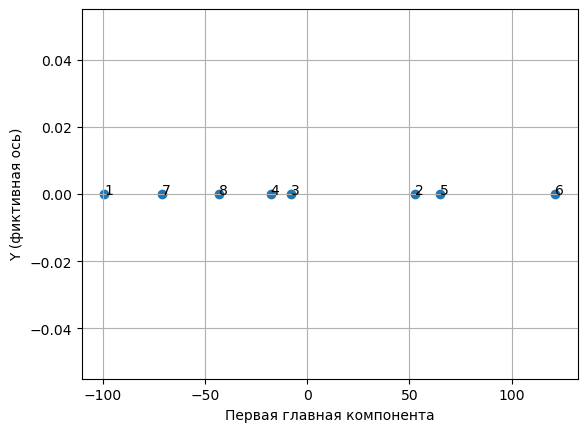

In [12]:
A_data = np.matmul(u_r, Z)
print("Первая главная компонента:\n", A_data)
# Нулевой вектор для графика
Y = np.zeros(len(A_data))

# Выводим точечный график
plt.scatter(A_data,Y)

# нумеруем каждую точку
cnt = 1
for i in range(0, len(A_data)):
    plt.text(A_data[i], Y[i], cnt)
    cnt = cnt + 1
# Добавление сетки
plt.grid()
# Подпись осей
plt.xlabel("Первая главная компонента")
plt.ylabel("Y (фиктивная ось)")
plt.show()

### Пункт 6

Первую главная компонента для матрицы D_2 (с помощью библиотеки sklearn):
 [[-99.13914295]
 [ 52.64714452]
 [ -7.82732432]
 [-17.82733111]
 [ 64.90280378]
 [121.43528139]
 [-71.05435481]
 [-43.13707649]]


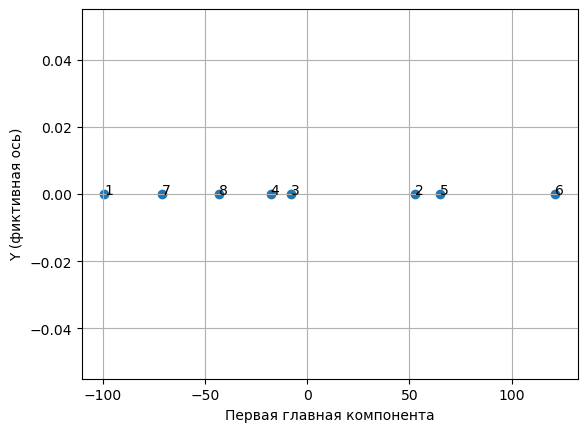

In [14]:
pca = PCA(n_components=1)
comp_1 = pca.fit_transform(D_2.T)
print("Первую главная компонента для матрицы D_2 "
      "(с помощью библиотеки sklearn):\n", comp_1)


# Нулевой вектор для графика
Y = np.zeros(len(comp_1))

# Выводим точечный график
plt.scatter(comp_1,Y)

# нумеруем каждую точку
cnt = 1
for i in range(0, len(comp_1)):
    plt.text(comp_1[i], Y[i], cnt)
    cnt = cnt + 1
# Добавление сетки
plt.grid()
# Подпись осей
plt.xlabel("Первая главная компонента")
plt.ylabel("Y (фиктивная ось)")
plt.show()

### Пункт 7

In [15]:
print(comp_1.T, A_data, sep="\n")

[[-99.13914295  52.64714452  -7.82732432 -17.82733111  64.90280378
  121.43528139 -71.05435481 -43.13707649]]
[-99.13914295  52.64714452  -7.82732432 -17.82733111  64.90280378
 121.43528139 -71.05435481 -43.13707649]


#### Вывод для 5 и 6 пунктов
Значения первой главной компоненты полученные с помощью библиотеки совпал с нашим результатом.

Поряд точек на обоих графиках одиннаковый.

### Пункт 8

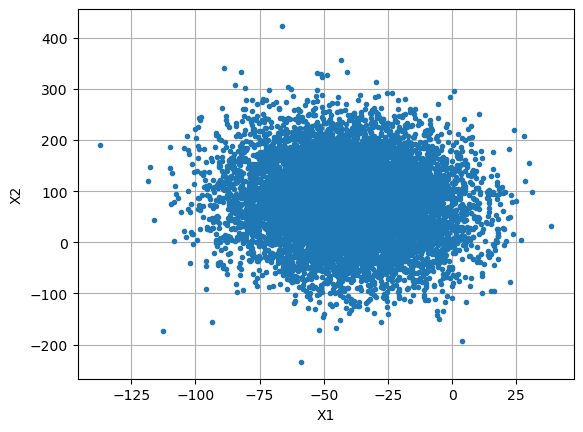

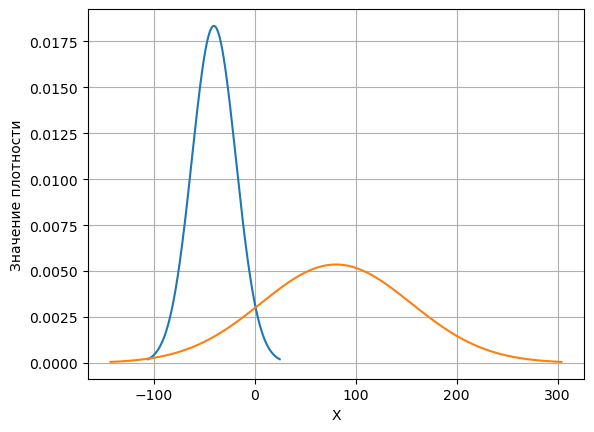

In [16]:
# Задание точек для диаграммы
x1, y1 = np.random.multivariate_normal(mu, cov_matr, 10000).T

# Вывод графика рассеивания
plt.plot(x1, y1, '.')
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

# Рассчет СКО
sko_0 = math.sqrt(cov_matr[0, 0])
sko_1 = math.sqrt(cov_matr[1, 1])

#Генерация значения иксов для первой компоненты
Xa = np.linspace(mu[0] - 3 * sko_0, mu[0] + 3 * sko_0, 500)
#Генерация значения иксов для второй компоненты
Xb = np.linspace(mu[1] - 3 * sko_1, mu[1] + 3 * sko_1, 500)

#Генерация значений графика плотности нормального распределения по уже сген. иксами для первой компоненты
Na = stats.norm.pdf(Xa, mu[0], sko_0)

#Генерация значений графика плотности нормального распределения по уже сген. иксами для второй компоненты
Nb = stats.norm.pdf(Xb, mu[1], sko_1)

#Вывод графика для первой компоненты
plt.plot(Xa, Na);
#Вывод графика для второй компоненты
plt.plot(Xb, Nb);
plt.xlabel("X")
plt.ylabel("Значение плотности")
plt.grid()
plt.show()

## Задание 3

1. Для данных и ядра из первого задания найдите первую главную компоненту при нелинейном преобразовании для заданного ядра. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)
2. Используя KernelPCA из библиотеки sklearn с ядром Гаусса и гаммой = 1, получите первую главную компоненту для данных из первого задания. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)
3. Визуально сравните графики, полученные в пунктах **1** и **2**. Определите, использование какого ядра (из первого задания или ядра Гаусса) позволяет, на ваш взгляд, лучше визуально выделить принадлежность точки к одному из двух кластеров

### Пункт 1

Первая главная компонента:
 [ 15.14318946  29.42604087 -10.55614091 -25.89262294  24.25974939
 -31.85766372 -21.46838998  20.94583784]


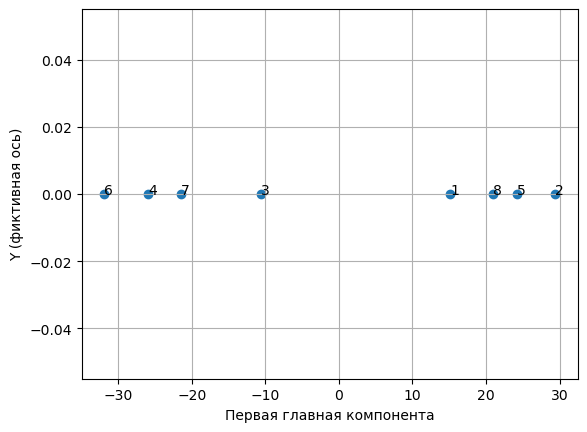

In [230]:
n = len(A)
# матрица со всеми единицами
I = np.ones((n, n))
# Центрирование матрицы ядра
kernel_c = np.matmul(np.matmul((np.eye(n) - I * 1/n), kernel), (np.eye(n) - I * 1/n))

# Получение собственных чисел и векторов
temp_data = np.linalg.eigh(kernel_c)

# Собственные числа
nu = temp_data[0]

# Собственные вектора
C = temp_data[1]

# Дисперсия каждого компонентов
var = nu / n

# Поиск максимальной дисперсии
ind = 0
for i in range(1, len(var)):
    if (var[ind] < var[i]):
        ind = i

c_r = C[ind]
data_comp_1 = np.matmul(c_r, kernel_c)
print("Первая главная компонента:\n", data_comp_1)

# Нулевой вектор для графика
Y = np.zeros(len(data_comp_1))

# Выводим точечный график
plt.scatter(data_comp_1,Y)

# нумеруем каждую точку
cnt = 1
for i in range(0, len(data_comp_1)):
    plt.text(data_comp_1[i], Y[i], cnt)
    cnt = cnt + 1
# Добавление сетки
plt.grid()
# Подпись осей
plt.xlabel("Первая главная компонента")
plt.ylabel("Y (фиктивная ось)")
plt.show()


### Пункт 2

Первая главная компонента с помощью ядра Гаусса:
 [[-0.28743084 -0.30960593  0.26910272  0.61903235 -0.5723228   0.61808082
   0.27201261 -0.60886894]]


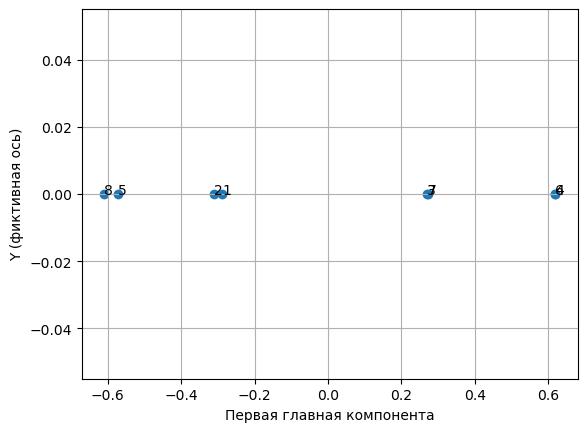

In [220]:
Kernelpca = KernelPCA(n_components=1, kernel="rbf",gamma=1)
gaus_data = Kernelpca.fit_transform(D_1);
print("Первая главная компонента с помощью ядра Гаусса:\n", gaus_data.T)

# Нулевой вектор для графика
Y = np.zeros(len(gaus_data))

# Выводим точечный график
plt.scatter(gaus_data,Y)

# нумеруем каждую точку
cnt = 1
for i in range(0, len(gaus_data)):
    plt.text(gaus_data[i], Y[i], cnt)
    cnt = cnt + 1
# Добавление сетки
plt.grid()
# Подпись осей
plt.xlabel("Первая главная компонента")
plt.ylabel("Y (фиктивная ось)")
plt.show()

### Пункт 3

Визульно, на графике с помощью ядра Гаусса видно 4 кластера. С помощью ядра из первого задания визуально можно различить 2 кластера. На мой взгляд лучше разделяет на кластеры ядро Гаусса, нежели ядро из первого задания.

## Для справки

1. Машинное обучение. Учебное пособие. Темы: 
   - Ядерные методы. Ядерные матрицы. Гауссово ядро
   - Снижение размерности. Метод главных компонент. Алгоритм 3.1
   - Ядерный анализ главных компонент. Алгоритм 3.2
2. [Как работает метод главных компонент (PCA) на простом примере](https://habr.com/ru/post/304214/)
3. [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html), [RBF kernel](https://scikit-learn.org/stable/modules/metrics.html#rbf-kernel)